### Handling Imbalanced Datasets - Feature Engineering Series

Hey everyone! Welcome back to our feature engineering series. In today's session, we're going to focus on **handling imbalanced datasets**, a critical aspect of preparing data for machine learning and deep learning models. 

---

#### What is an Imbalanced Dataset?
Before diving into the techniques to handle imbalanced datasets, let's first understand what we mean by **imbalanced data**.

When working on machine learning projects, especially **classification problems**, the dataset is often divided into different categories or classes. For example:
- **Binary Classification**: Predicting outcomes like Yes/No, True/False, or Spam/Not Spam.

Let's say we have a dataset with **1000 samples**, where our target variable has two categories:
- **Class 1 (Yes)**: 900 samples
- **Class 0 (No)**: 100 samples

This results in a **9:1 ratio** between the two classes. Such a scenario is called an **imbalanced dataset** because one class significantly outnumbers the other.

---

#### Why Should We Address Imbalanced Datasets?
If your model is trained on imbalanced data, it will become biased towards the majority class. For instance, in our previous example, the model might always predict "Yes" because it appears in 90% of the samples. This leads to poor performance on the minority class ("No"), which is often the class of greater interest, especially in real-world applications like fraud detection, medical diagnosis, or rare event prediction.

---

#### Techniques to Handle Imbalanced Datasets
To balance the dataset, we have two main strategies:
1. **Upsampling (Oversampling)**
2. **Downsampling (Undersampling)**

Let's go through each technique with practical examples.

---

### 1. Upsampling the Minority Class
**Upsampling** involves increasing the number of samples in the minority class to match the majority class. This is done by creating synthetic data points, effectively balancing the dataset.

##### Steps:
- Separate the dataset into **majority** and **minority** classes.
- Use the `resample` method from `sklearn.utils` to generate new samples for the minority class.
- Concatenate the original majority class with the newly upsampled minority class.

In [26]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

# Fixing random seed for reproducibility
np.random.seed(42)

# Creating a synthetic imbalanced dataset
n_samples = 1000
class_ratio = 0.9  # 90% Class 0, 10% Class 1
n_class_0 = int(n_samples * class_ratio)  # 900 samples
n_class_1 = n_samples - n_class_0  # 100 samples

# Creating dataframes for Class 0 and Class 1
class_0 = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, n_class_0),
    'Feature2': np.random.normal(1, 2, n_class_0),
    'Target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'Feature1': np.random.normal(1, 1, n_class_1),
    'Feature2': np.random.normal(2, 2, n_class_1),
    'Target': [1] * n_class_1
})

# Concatenating to create the imbalanced dataset
df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Upsampling the minority class
df_minority = df[df['Target'] == 1]
df_majority = df[df['Target'] == 0]

df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=n_class_0,  # match number of majority class
                                 random_state=42)

# Creating the upsampled dataset
df_upsampled = pd.concat([df_majority, df_minority_upsampled]).reset_index(drop=True)

# Checking the class distribution after upsampling
print(df_upsampled['Target'].value_counts())

Target
0    900
1    900
Name: count, dtype: int64


As you can see, after upsampling, we have **900 samples** for each class, making the dataset balanced.

### 2. Downsampling the Majority Class
**Downsampling** involves reducing the number of samples in the majority class to match the minority class.

##### Steps:
- Separate the dataset into **majority** and **minority** classes.
- Use the `resample` method to randomly select a subset of samples from the majority class.
- Concatenate the downsampled majority class with the original minority class.

In [27]:
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=n_class_1,  # match number of minority class
                                   random_state=42)

# Creating the downsampled dataset
df_downsampled = pd.concat([df_majority_downsampled, df_minority]).reset_index(drop=True)

# Checking the class distribution after downsampling
print(df_downsampled['Target'].value_counts())

Target
0    100
1    100
Name: count, dtype: int64


Here, we've reduced the majority class samples to **100**, making both classes equal. However, downsampling can lead to **loss of valuable data**, especially if you have a small dataset to begin with.

### When to Use Upsampling vs. Downsampling?
- **Upsampling** is generally preferred when you want to preserve all your data and can afford to generate synthetic samples.
- **Downsampling** is useful when you have a large dataset and want to reduce training time and resource consumption.


This video script on **SMOTE (Synthetic Minority Oversampling Technique)** is detailed and educational, guiding viewers through the entire process of handling imbalanced datasets using SMOTE. Here's a refined breakdown and summary of the key concepts, to make it flow more smoothly for your audience:

---

### Video Script: Handling Imbalanced Datasets with SMOTE

---

**Introduction:**

Hello everyone!  
Welcome back to our feature engineering series. In the previous videos, we discussed various techniques to handle imbalanced datasets, specifically focusing on upsampling and downsampling methods. Today, we're diving into a popular upsampling technique called **SMOTE**, which stands for **Synthetic Minority Oversampling Technique**.

**What is SMOTE?**

So, what exactly is SMOTE?  
SMOTE is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. Unlike traditional upsampling, which simply duplicates existing minority class examples, SMOTE generates **synthetic samples** by interpolating between existing minority class instances. 

This approach helps increase the **variance** of the minority class, making it more diverse and better represented in the dataset.

---

**Difference Between Regular Upsampling and SMOTE:**

To understand this better, let's quickly recap regular upsampling:  
In traditional upsampling, we increase the count of the minority class by duplicating the same data points, which doesn't add any new information. This can lead to **overfitting**, as the duplicated points don't contribute to the diversity of the dataset.

SMOTE, on the other hand, addresses this issue by creating **synthetic data points** between the existing ones, thereby adding variability. Let me visualize this for you.

**Visual Explanation:**

Imagine a 2D feature space with two classes:

- Majority class points are scattered densely on one side (let's mark them as blue).
- Minority class points are sparsely located on the other side (let's mark them as red).

In regular upsampling, we would simply add more red dots at the same existing positions. But in SMOTE, we take two close red points, draw a line between them, and create synthetic points along that line. This method effectively increases the dataset's diversity and reduces the likelihood of overfitting.

---

**Creating a Synthetic Dataset for Demonstration:**

To demonstrate SMOTE, we'll generate an imbalanced dataset using the **`make_classification`** function from `sklearn`. Let's go ahead and create a dataset:


In [28]:
from sklearn.datasets import make_classification

# Generate a dataset
X, y = make_classification(
    n_samples=1000,        # Total 1000 data points
    n_features=2,          # 2 features for easy visualization
    n_clusters_per_class=1,
    weights=[0.9, 0.1],    # 90% majority class, 10% minority class
    n_redundant=0,         # No redundant features
    random_state=42
)

This dataset has two features (F1 and F2) and is highly imbalanced, with only 10% of the points belonging to the minority class.
**Visualizing the Dataset:**

Let's visualize this dataset using a scatter plot:


In [2]:
n_class_0,n_class_1

(900, 100)

In [3]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [4]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [6]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [7]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [8]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [9]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [10]:
df_minority_upsampled.shape

(900, 3)

In [11]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [13]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [14]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

target
0    895
1    105
Name: count, dtype: int64


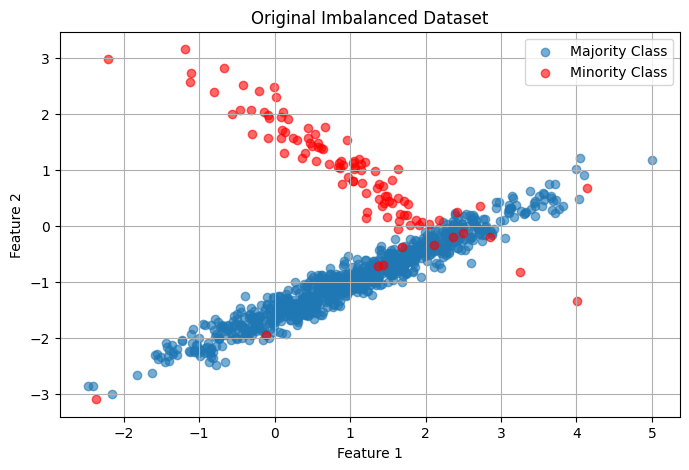

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for visualization
df = pd.DataFrame(X, columns=['F1', 'F2'])
df['target'] = y

print(df['target'].value_counts())
# Plotting the dataset
plt.figure(figsize=(8, 5))
plt.scatter(df[df['target'] == 0]['F1'], df[df['target'] == 0]['F2'], label='Majority Class', alpha=0.6)
plt.scatter(df[df['target'] == 1]['F1'], df[df['target'] == 1]['F2'], label='Minority Class', alpha=0.6, color='red')
plt.title('Original Imbalanced Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

You can see that the minority class (red points) is heavily outnumbered by the majority class (blue points).

---

**Applying SMOTE to Balance the Dataset:**

To apply SMOTE, we will use the **`imbalanced-learn`** library, specifically the `SMOTE` class.

In [30]:
# Install imbalanced-learn if not already installed
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
from collections import Counter
print(f"Original dataset class distribution: {Counter(y)}")
print(f"Resampled dataset class distribution: {Counter(y_resampled)}")

Original dataset class distribution: Counter({0: 895, 1: 105})
Resampled dataset class distribution: Counter({0: 895, 1: 895})


**Visualizing the Balanced Dataset:**

Now let's visualize the dataset after applying SMOTE:

target
0    895
1    895
Name: count, dtype: int64


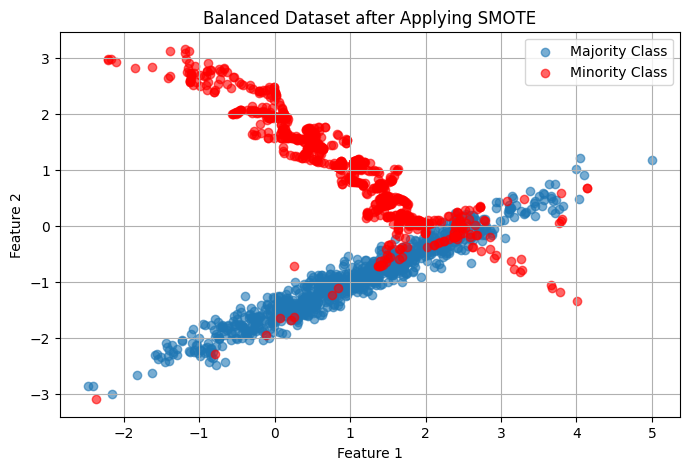

In [36]:
df_resampled = pd.DataFrame(X_resampled, columns=['F1', 'F2'])
df_resampled['target'] = y_resampled
print(df_resampled['target'].value_counts())
# Plot the resampled dataset
plt.figure(figsize=(8, 5))
plt.scatter(df_resampled[df_resampled['target'] == 0]['F1'], df_resampled[df_resampled['target'] == 0]['F2'], label='Majority Class', alpha=0.6)
plt.scatter(df_resampled[df_resampled['target'] == 1]['F1'], df_resampled[df_resampled['target'] == 1]['F2'], label='Minority Class', alpha=0.6, color='red')
plt.title('Balanced Dataset after Applying SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()